In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns',30)

In [21]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [22]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [23]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [24]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [26]:
df['age']

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [27]:
df['age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64>

1. What is the distribution of age among heart failure patients in the dataset?

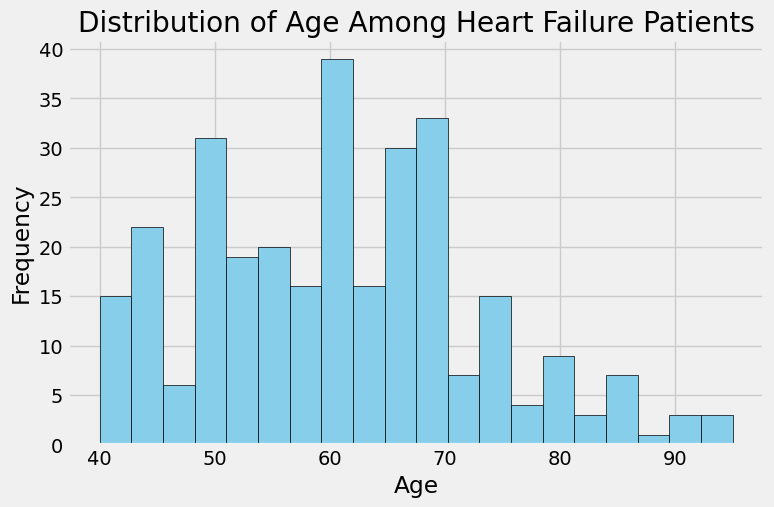

In [34]:
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2.How does the death rate vary with age?

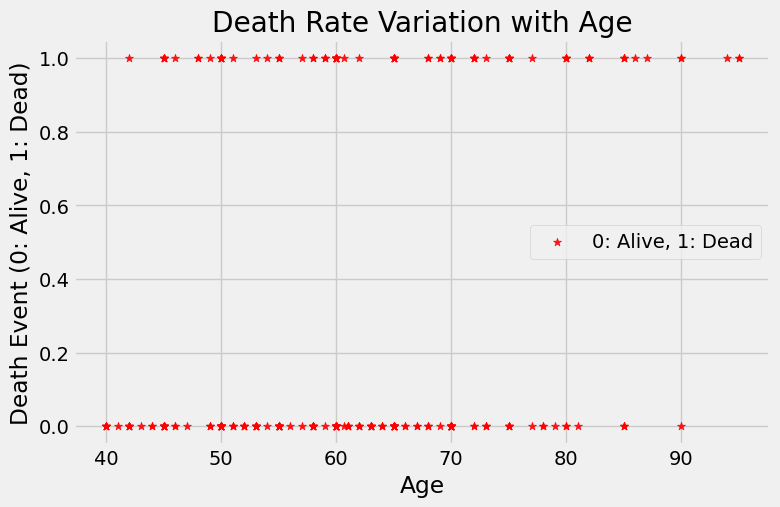

In [89]:
age_data = df['age']
death_event = df['DEATH_EVENT']
plt.figure(figsize=(8, 5))
plt.scatter(age_data, death_event, color='red', alpha=0.9,marker='*',label='0: Alive, 1: Dead')
plt.title('Death Rate Variation with Age')
plt.xlabel('Age')
plt.ylabel('Death Event (0: Alive, 1: Dead)')
plt.legend()
plt.grid(True)
plt.show()

3. What is the percentage of male and female patients in the dataset?

In [71]:
df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

<Axes: ylabel='count'>

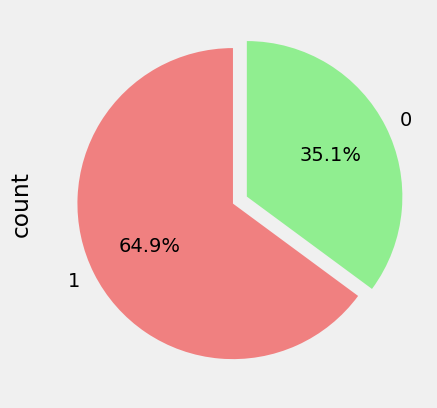

In [72]:
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90)

4.How does the platelet count vary among different age groups?

In [75]:
df[['age','platelets']]

,age,platelets
0,75.0,265000.00
1,55.0,263358.03
2,65.0,162000.00
3,50.0,210000.00
4,65.0,327000.00
...,...,...
294,62.0,155000.00
295,55.0,270000.00
296,45.0,742000.00
297,45.0,140000.00


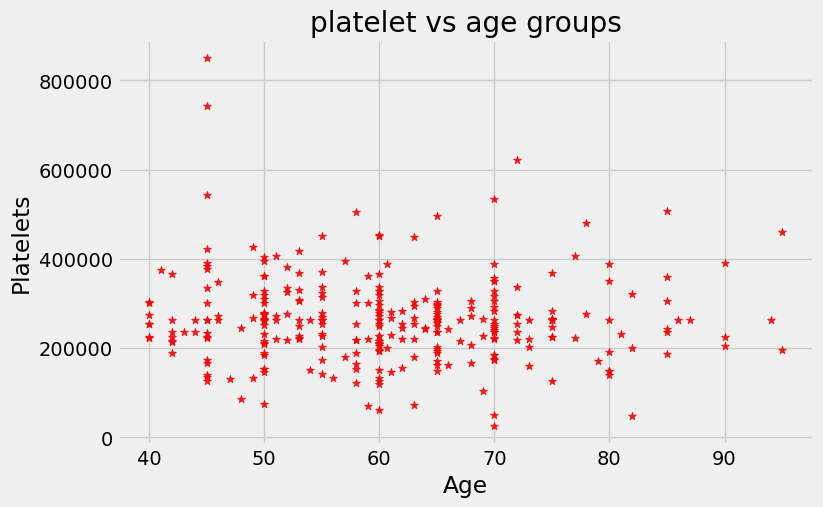

In [77]:
age_data1 = df['age']
platelets_data = df['platelets']
plt.figure(figsize=(8, 5))
plt.scatter(age_data, platelets_data, color='red', alpha=0.9,marker='*')
plt.title('platelet vs age groups')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.grid(True)
plt.show()

5. Is there a correlation between creatinine and sodium levels in the blood?

In [94]:
creatinine_levels = df['creatinine_phosphokinase']
sodium_levels = df['serum_sodium']

# Calculate the correlation coefficient
correlation = creatinine_levels.corr(sodium_levels)

print("1.Correlation coefficient between creatinine and sodium levels:", correlation)

if abs(correlation) < 0.1:
    print("2.Hence there is no significant correlation between creatinine and sodium levels.")
elif abs(correlation) < 1:
    print("2.Hence there is strong positive correlation between creatinine and sodium levels.")
else:
    print("2.Hence there is negative correlation  correlation between creatinine and sodium levels.")

1.Correlation coefficient between creatinine and sodium levels: 0.059550155833725624
2.Hence there is no significant correlation between creatinine and sodium levels.


6. How does the prevalence of high blood pressure differ between male and female patients?


In [95]:
prevalence = df.groupby('sex')['high_blood_pressure'].mean() * 100

print("Prevalence of high blood pressure:")
print(prevalence)

Prevalence of high blood pressure:
sex
0    41.904762
1    31.443299
Name: high_blood_pressure, dtype: float64


7. What is the relationship between smoking habits and the occurrence of heart failure?

Correlation coefficient between smoking status and heart failure: -0.012623152709359603



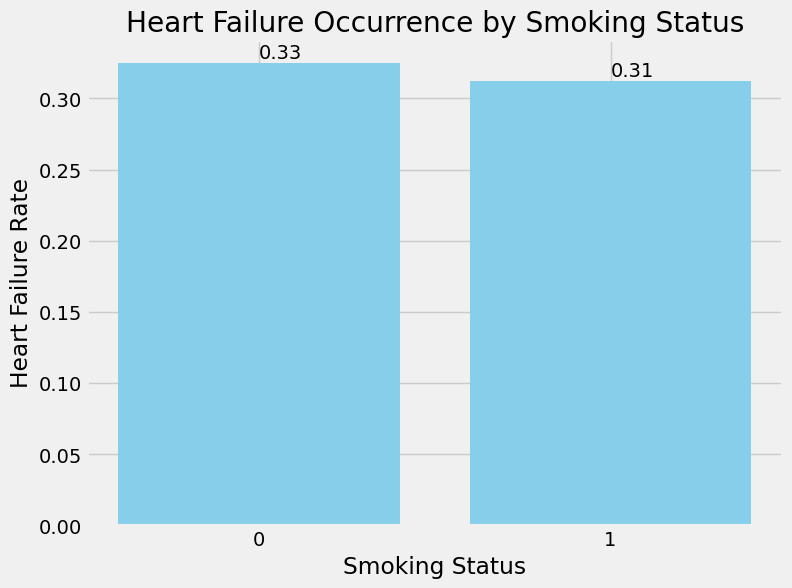

In [116]:
smoking_status = df['smoking']
heart_failure = df['DEATH_EVENT']

# Calculating the correlation coefficient (if 'heart_failure' is binary)
correlation_coefficient = df['smoking'].corr(df['DEATH_EVENT'])

print("Correlation coefficient between smoking status and heart failure:", correlation_coefficient)
print("")
# Creating a DataFrame to calculate heart failure rate by smoking status
heart_failure_rate = df.groupby('smoking')['DEATH_EVENT'].mean().reset_index()

# Visualizing the data 
plt.figure(figsize=(8, 6))
bars = plt.bar(heart_failure_rate['smoking'], heart_failure_rate['DEATH_EVENT'], color='skyblue')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Heart Failure Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Heart Failure Rate')
plt.xticks([0, 1], ['0', '1'])

plt.show()

8. Are there any noticeable patterns in the distribution of death events across different age groups?

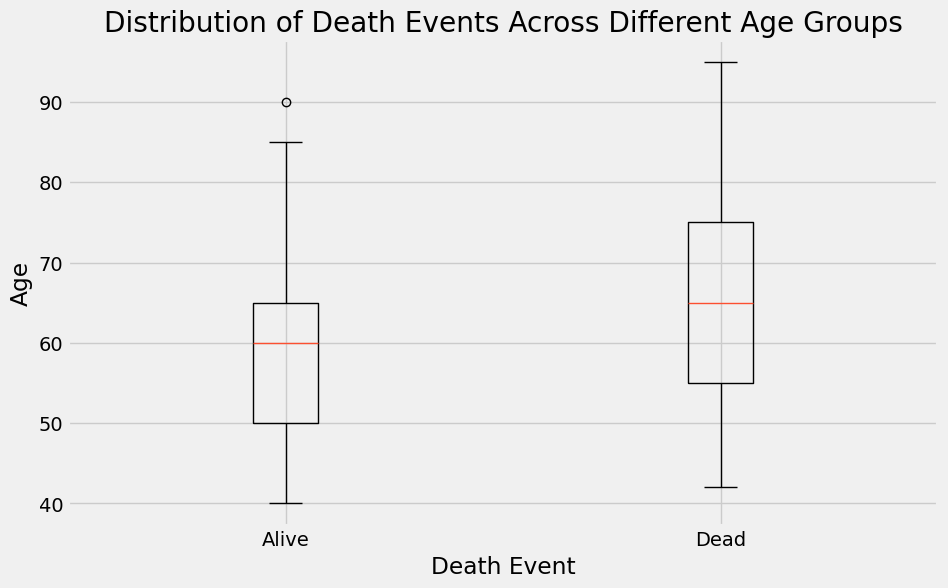

In [117]:
age = df['age']
death_event = df['DEATH_EVENT']

# Plotting a box plot to visualize the distribution of death events across different age groups
plt.figure(figsize=(10, 6))
plt.boxplot([age[death_event == 0], age[death_event == 1]], labels=['Alive', 'Dead'])
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.show()

9. Is there any significant difference in ejection fraction between patients with and without diabetes?

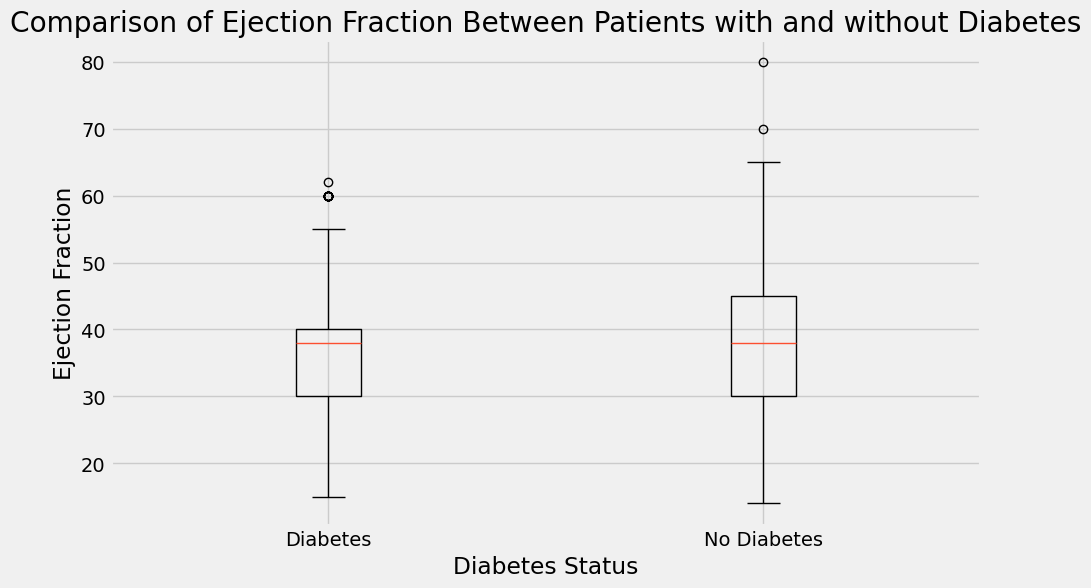

In [121]:
ejection_fraction_diabetes = df.loc[df['diabetes'] == 1, 'ejection_fraction']
ejection_fraction_no_diabetes = df.loc[df['diabetes'] == 0, 'ejection_fraction']
plt.figure(figsize=(10, 6))
plt.boxplot([ejection_fraction_diabetes, ejection_fraction_no_diabetes], labels=['Diabetes', 'No Diabetes'])
plt.title('Comparison of Ejection Fraction Between Patients with and without Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Ejection Fraction')
plt.show()

10.How does the serum creatinine level vary between patients who survived and those who did not?

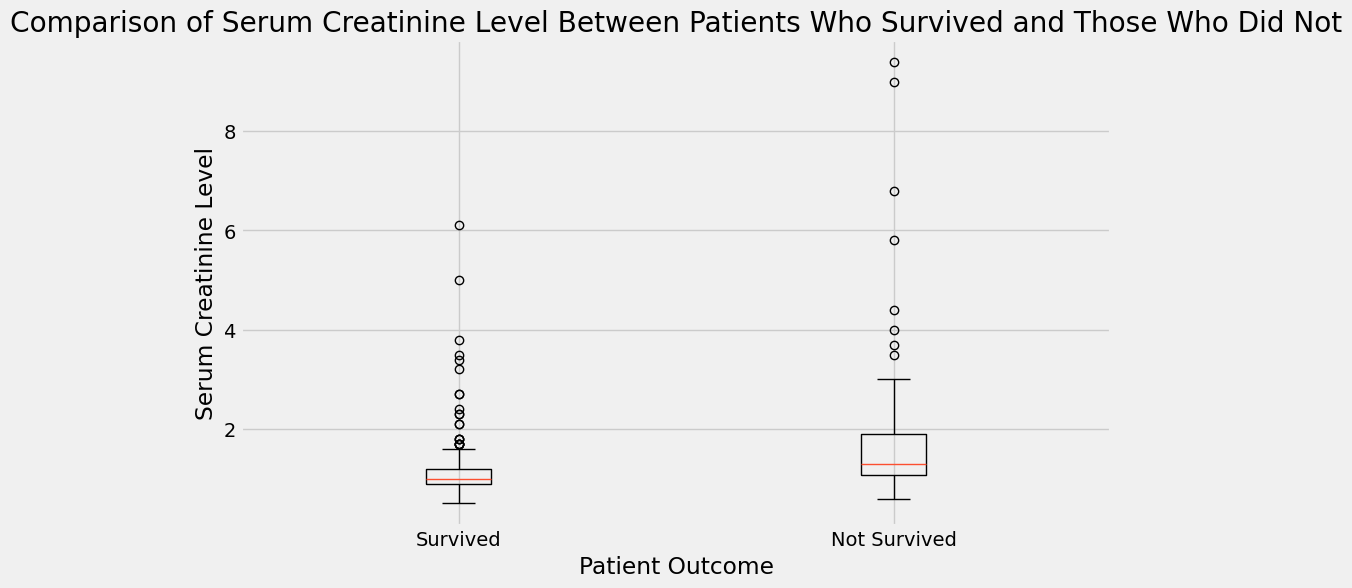

In [122]:
serum_creatinine_survived = df.loc[df['DEATH_EVENT'] == 0, 'serum_creatinine']
serum_creatinine_not_survived = df.loc[df['DEATH_EVENT'] == 1, 'serum_creatinine']

# Plotting box plots to compare the distributions
plt.figure(figsize=(10, 6))
plt.boxplot([serum_creatinine_survived, serum_creatinine_not_survived], labels=['Survived', 'Not Survived'])
plt.title('Comparison of Serum Creatinine Level Between Patients Who Survived and Those Who Did Not')
plt.xlabel('Patient Outcome')
plt.ylabel('Serum Creatinine Level')
plt.show()